In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as teg
import netCDF4 as nc
plt.rcParams["axes.formatter.use_mathtext"] = True
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'Dejavu Serif'

In [2]:
# params

nx = 500
ny = 500
nz = 50
ts = [0,6]

nxp1 = 501
nyp1 = 501

loadLoc = "/scratch/hcm7920/amb0/data/"

In [3]:
# initialize some arrays

difZ = np.zeros(shape=(len(ts),51,500,500))
advZ = np.zeros(shape=(len(ts),51,500,500))

In [4]:
# load arrays

data = nc.Dataset(loadLoc+"diagsTendency.nc")
difZ[:,:-1,:,:] = data["DFrI_SLT"][ts,:,:,:]
advZ[:,:-1,:,:] = data["ADVr_SLT"][ts,:,:,:]
advX = data["ADVx_SLT"][ts,:,:,:]
advY = data["ADVy_SLT"][ts,:,:,:]
totTendency = data["TOTSTEND"][ts,:,:,:]

In [5]:
# load arrays

data = nc.Dataset(loadLoc+"grid.nc")
cArea = data["rA"][:,:]
cFace = data["drF"][:]
cVol = cArea[np.newaxis,:,:]*cFace[:,np.newaxis,np.newaxis]
depth = data["Z"][:]

In [6]:
# load arrays

data = nc.Dataset(loadLoc+"diagsDynamics.nc")
sltF = data["gS_Forc"][ts,:,:,:]

In [7]:
# calc tendency budget

advTendZ = (advZ[:,:-1,:,:] - advZ[:,1:,:,:]) / cVol[np.newaxis,:,:,:]
advTendY = (advY[:,:,1:,:] - advY[:,:,:-1,:]) / cVol[np.newaxis,:,:,:]
advTendX = (advX[:,:,:,1:] - advX[:,:,:,:-1]) / cVol[np.newaxis,:,:,:]
difTendZ = (difZ[:,:-1,:,:] - difZ[:,1:,:,:]) / cVol[np.newaxis,:,:,:]

totForcing = (advTendZ
              + advTendY
              + advTendX
              + difTendZ
              - sltF)*86400

In [8]:
# print tests
print(abs(totForcing).max(),"\n")
print(abs(totTendency).max(),"\n")
print(abs(totForcing-totTendency).max(),"\n")
print(abs(totForcing+totTendency).max(),"\n")

0.07905098792501154 

0.08288622 

0.15810350325294198 

0.015797721560185704 



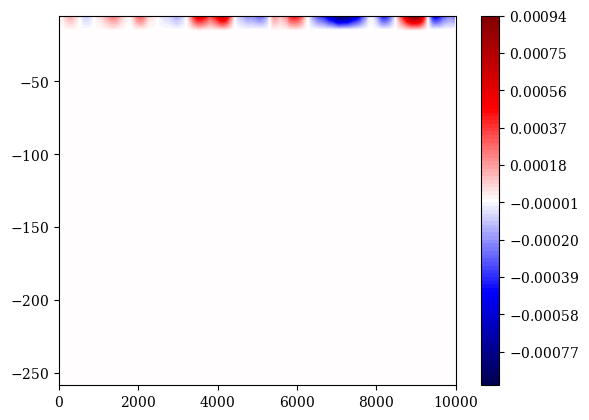

In [9]:
dI = 25
data = (totForcing+totTendency)[:,:dI,:,:].mean((0,3))
myLevs = np.linspace(-data.max(),data.max(),100)

plt.contourf(np.linspace(0,1e4,500),depth[:dI],data,
             myLevs,cmap="seismic")
plt.colorbar()

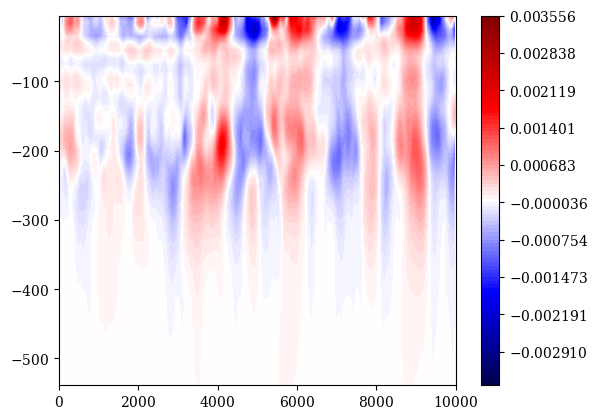

In [14]:
dI = 32
data = totTendency[:,:dI,:,:].mean((0,3))
myLevs = np.linspace(-data.max(),data.max(),100)

plt.contourf(np.linspace(0,1e4,500),depth[:dI],data,
             myLevs,cmap="seismic")
plt.colorbar()

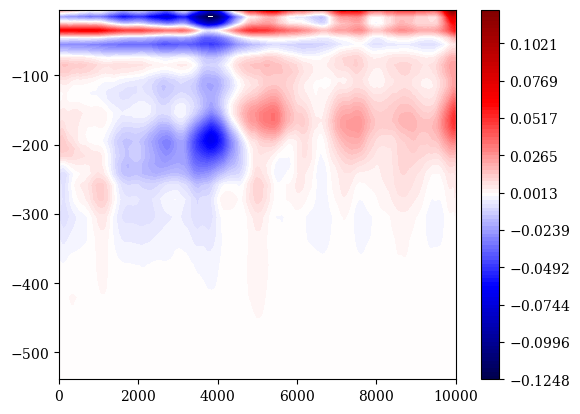

In [13]:
dI = 32
data = sltF[:,:dI,:,:].mean((0,3)) * 864000
myLevs = np.linspace(-data.max(),data.max(),100)

plt.contourf(np.linspace(0,1e4,500),depth[:dI],data,
             myLevs,cmap="seismic")
plt.colorbar()